# TP1: MLP for Regression

*By Daniel Deutsch*

# Lab / MLP for regression / pytorch

For any remark or suggestion, please feel free to contact me at:
geoffroy.peeters@telecom-paristech.fr

Last edit: 2019/06/13

## Objective:

The objective of this lab is to demonstrate the use of Neural Networks to perform non-linear regression.
We will use a simple NN with 1 hidden layer of n_h=10 hidden units and either a ```sigmoid```, ```relu``` or ```tanh``` activation.
You will perform 1000 iterations (epochs) of SGD to find the parameters.

You will then apply the network to the two datasets A and B.

Note: for this lab, we do not separate the dataset into a train, validation and test part. We simply check the ```capacity``` of the network to model the training data.

**Question**: according to the obtained loss, discuss the choice of ```sigmoid```, ```relu``` or ```tanh```.



### Data normalization

you should normalize the data to zero mean and unit standard deviation

### Model

There are various ways to write NN model in pytorch. 

In this lab, you will write three different implementations:
- **Model A**: manually defining the parameters (W1,b1,w2,b2), writting the forward equations, writting the loss equation, calling the .backward() and manually updating the weights using W1.grad. You will write the loop to perform 1000 epochs.
- **Model B**: using the Sequential class of pytorch
- **Model C**: a custom torch.nn.Module class for this.

For Model B and C, you will use the ready made loss and optimization from the nn and optim packages. You can use the same code to optimize the parameters of Model B and C.

### Loss

Since we are dealing with a regression problem, we will use a Mean Square Error loss (use ```torch.nn.MSELoss``` for Model B and C).

### Parameters update/ Optimization

For updating the parameters, we will use as optimizer a simple SGD algorithm (use ```torch.optim.SGD``` for Model B and C) with a learning rate of 0.05.

Don't forget that an optimizer is applied to a set of parameters (```my_model.parameters()``` gives the parameters of the network for Model B and C).
Once the gradients have been computed (after the backpropagation has been performed), you can perform one step of optimization (using ```optimizer.step()``` for Model B and C).

### Backward propagation

Backpropagation is automatically performed in pytorch using the ```autograd``` package. 
First, reset the gradients of all parameters (using ```optimizer.zero_grad()``` for Model B and C), then perform the backpropagation ```loss.backward()```. 

### Regularization

- How can you add a Ridge (L2) regularization ? this can be done easely within the definition of the optimizer.
- How can you add a Lasso (L1) regularization ? this has to be done manually at each iteration, by adding something to the loss before backpropagation.

** Question **: discuss the use of the Ridge and Lasso regularization for each dataset.

## Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

## Documentation:
- NN: https://pytorch.org/docs/stable/nn.html
- Autograd: https://pytorch.org/docs/stable/autograd.html
- Optim: https://pytorch.org/docs/stable/optim.html


## Load the python packages

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

## Dataset A

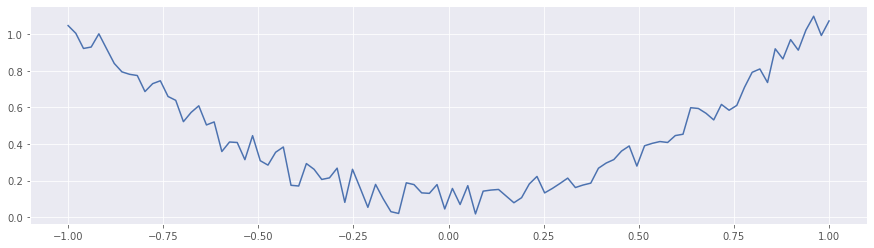

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x_data, y_data = Variable(x), Variable(y)
# ----------------
plt.plot(x.numpy(), y.numpy())
plt.show()

## Dataset B

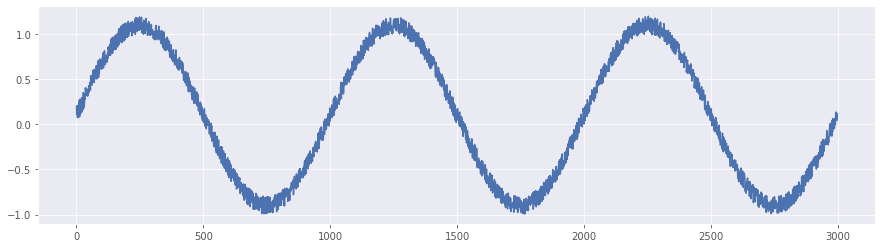

In [4]:
x = np.arange(0, 3000)
y = np.sin(2*np.pi*x*0.001) + 0.2*np.random.rand(x.shape[0])  
x_data = Variable(torch.from_numpy(x).float())
y_data = Variable(torch.from_numpy(y).float())
x_data = x_data[:,None]
y_data = y_data[:,None]
# ----------------
plt.plot(x,y)
plt.show()

## Normalization

In [5]:
# --- START CODE HERE
x_data = (x_data - x_data.mean())/x_data.std()
y_data = (y_data - y_data.mean())/y_data.std()
# --- END CODE HERE

## Definition of the hyper-parameters

In [6]:
n_in = 1
n_h = 10
n_out = 1

nbEpoch = 1000
alpha = 0.05

## Model 1 (writting the network equations)

epoch 0, loss 8.193490982055664
epoch 500, loss 0.6401519179344177


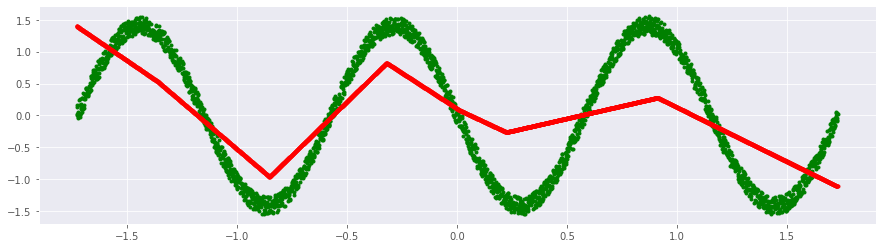

In [7]:
# --- START CODE HERE
W1 = torch.randn(n_in, n_h, requires_grad=True)
b1 = torch.randn(n_h, requires_grad=True)
W2 = torch.randn(n_h, n_out, requires_grad=True)
b2 = torch.randn(n_out, requires_grad=True)
# --- END CODE HERE

def model(X):
    # --- START CODE HERE
    h = X.mm(W1) + b1
    a = F.relu(h)   # ReLu activation
    hat_y = a.mm(W2) + b2
    # --- END CODE HERE
    return hat_y


for epoch in range(0, nbEpoch):    
    # --- X (n_in, N)
    # --- Y (n_out, N)
    # --- START CODE HERE
    hat_y = model(x_data)
    loss = (hat_y - y_data).pow(2).sum() / y_data.shape[0]   # MSE
    # --- END CODE HERE
    
    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss))

    loss.backward()
    with torch.no_grad():
        # --- START CODE HERE
        W1 -= alpha*W1.grad 
        b1 -= alpha*b1.grad 
        W2 -= alpha*W2.grad 
        b2 -= alpha*b2.grad 
        # --- END CODE HERE
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()
        
# ----------------
plt.plot(x_data.numpy(), y_data.numpy(), 'g.')
plt.plot(x_data.numpy(), hat_y.detach().numpy(), 'r.') 
plt.show()

## Model 2 (using Sequential)

In [8]:
# --- START CODE HERE
my_model = nn.Sequential(
    torch.nn.Linear(n_in, n_h),
    torch.nn.ReLU(),
    torch.nn.Linear(n_h, n_out)
)
# --- END CODE HERE

## Model 3 (using a class)

In [9]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # --- START CODE HERE
        self.hidden = torch.nn.Linear(n_in, n_h)
        self.predict = torch.nn.Linear(n_h, n_out)
        # --- END CODE HERE
        
    def forward(self, x):
        
        # --- START CODE HERE
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        # --- END CODE HERE
        
        return x

# --- START CODE HERE
my_model = Net()
# --- END CODE HERE

## Optimization for model 2 and model 3

In [10]:
# --- START CODE HERE
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = optim.SGD(my_model.parameters(), lr=alpha, weight_decay=0)
# --- END CODE HERE

epoch 0, loss 1.098841905593872
epoch 500, loss 0.7134894728660583
epoch 1000, loss 0.6558537483215332
epoch 1500, loss 0.6310603022575378
epoch 2000, loss 0.6181977987289429
epoch 2500, loss 0.6128025054931641
epoch 3000, loss 0.6096863746643066
epoch 3500, loss 0.6074749231338501
epoch 4000, loss 0.6056221723556519
epoch 4500, loss 0.6038762927055359
epoch 5000, loss 0.6021268367767334
epoch 5500, loss 0.6003300547599792
epoch 6000, loss 0.7905651926994324
epoch 6500, loss 0.5997816920280457
epoch 7000, loss 0.6066887378692627
epoch 7500, loss 0.6112543940544128
epoch 8000, loss 0.6145662069320679
epoch 8500, loss 0.6192014217376709
epoch 9000, loss 0.6215959191322327
epoch 9500, loss 0.620935320854187


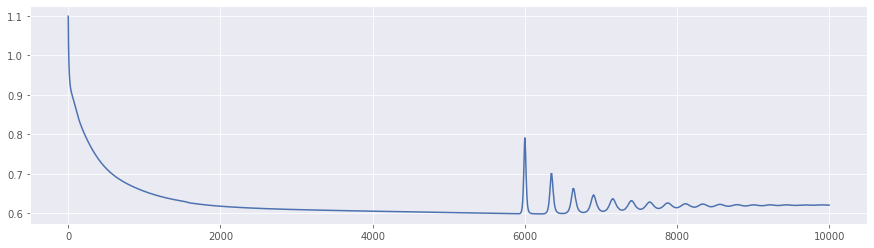

In [11]:
loss_l = []
for epoch in range(10000):
  
    # --- START CODE HERE
    pred_y = my_model(x_data)    
    loss = criterion(pred_y, y_data)
    loss_l.append(loss.data.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # --- END CODE HERE

    if epoch % 500 == 0:
        print('epoch {}, loss {}'.format(epoch, loss))
        
# ----------------
plt.plot(loss_l)
plt.show()        

## Plotting results

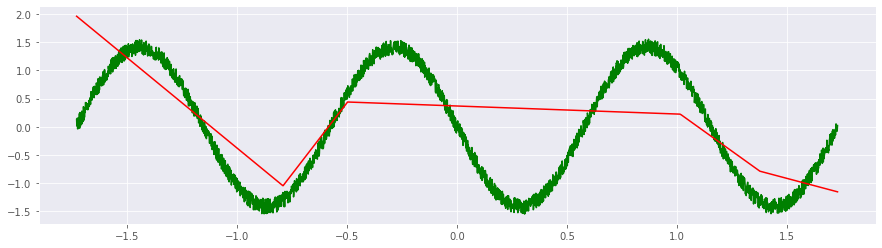

In [12]:
# ----------------
plt.plot(x_data.numpy(), y_data.numpy(), 'g')
plt.plot(x_data.numpy(), pred_y.detach().numpy(), 'r')
plt.show()

# Discussion

Here is a function that I've implemented based on the previous exercises (**notice that I've added here the implementation of regularization**). It just facilitates the comparison of different params and draw conclusions.

In [41]:
def MLP_regression(dataset="A", model_type="mannual", activation_fcn="relu", nbEpoch=10000, alpha=0.05, regularization_type=None, regularization_param=0.0001):

    #------------------------------#
    #--- VARIABLES ----------------#
    #------------------------------#

    # Init returned variables
    x_data, y_data, hat_y = None, None, None
    epochs, losses = [], []

    # Set hyper-parameters
    n_in, n_h, n_out = 1, 10, 1

    #------------------------------#
    #--- DATASET ------------------#
    #------------------------------#

    # Obtains data
    if dataset == "A":
        x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
        y = x.pow(2) + 0.2*torch.rand(x.size())
        x_data, y_data = Variable(x), Variable(y)
    elif dataset == "B":
        x = np.arange(0, 3000)
        y = np.sin(2*np.pi*x*0.001) + 0.2*np.random.rand(x.shape[0])  
        x_data = Variable(torch.from_numpy(x).float())
        y_data = Variable(torch.from_numpy(y).float())
        x_data = x_data[:,None]
        y_data = y_data[:,None]
    else:
        raise Exception("Invalid param 'dataset'")

    # Normalize data
    x_data = (x_data - x_data.mean())/x_data.std()
    y_data = (y_data - y_data.mean())/y_data.std()


    #------------------------------#
    #--- MODEL --------------------#
    #------------------------------#

    if model_type == "mannual":

        # Inits weights and bias 
        W1 = torch.randn(n_in, n_h, requires_grad=True)
        b1 = torch.randn(n_h, requires_grad=True)
        W2 = torch.randn(n_h, n_out, requires_grad=True)
        b2 = torch.randn(n_out, requires_grad=True)

        # Defines the model function
        def model(X):
            h = X.mm(W1) + b1
            if activation_fcn == "relu":
                a = F.relu(h)
            elif activation_fcn == "sigmoid":
                a = F.sigmoid(h)
            elif activation_fcn == "tanh":
                a = F.tanh(h)
            else:
                raise Exception("Invalid param 'activation_fcn'")
            hat_y = a.mm(W2) + b2
            return hat_y

    elif model_type == "sequential":
        
        if activation_fcn == "relu":
            activation = torch.nn.ReLU()
        elif activation_fcn == "sigmoid":
            activation = torch.nn.Sigmoid()
        elif activation_fcn == "tanh":
            activation = torch.nn.Tanh()
        else:
            raise Exception("Invalid param 'activation_fcn'")

        my_model = nn.Sequential(
            torch.nn.Linear(n_in, n_h),
            activation,
            torch.nn.Linear(n_h, n_out)
        )

    elif model_type == "class":
        class Net(torch.nn.Module):
            def __init__(self):
                super(Net, self).__init__()
                self.hidden = torch.nn.Linear(n_in, n_h)
                self.predict = torch.nn.Linear(n_h, n_out)
            def forward(self, x):
                x = self.hidden(x)
                if activation_fcn == "relu":
                    x = F.relu(x)
                elif activation_fcn == "sigmoid":
                    x = F.sigmoid(x)
                elif activation_fcn == "tanh":
                    x = F.tanh(x)
                else:
                    raise Exception("Invalid param 'activation_fcn'")
                x = self.predict(x)                
                return x

        my_model = Net()

    else:
        raise Exception("Invalid param 'model_type'")

    
    #------------------------------#
    #--- OPTIMIZATION -------------#
    #------------------------------#

    if model_type == "mannual":
        for epoch in range(0, nbEpoch):    
            hat_y = model(x_data)
            loss = (hat_y - y_data).pow(2).sum() / y_data.shape[0]   # MSE
            if regularization_type == "L1":
                loss += regularization_param*(W1.abs().sum() + b1.abs().sum() + W2.abs().sum() + b2.abs().sum())
            elif regularization_type == "L2":
                loss += regularization_param*(W1.pow(2).sum() + b1.pow(2).sum() + W2.pow(2).sum() + b2.pow(2).sum())
            elif not regularization_type:
                pass
            else:
                raise Exception("Invalid param 'regularization_type'")
            losses.append(loss.data.item())
            epochs.append(epoch)
            loss.backward()
            with torch.no_grad():
                W1 -= alpha*W1.grad 
                b1 -= alpha*b1.grad 
                W2 -= alpha*W2.grad 
                b2 -= alpha*b2.grad 
                W1.grad.zero_()
                b1.grad.zero_()
                W2.grad.zero_()
                b2.grad.zero_()

    else:
        criterion = torch.nn.MSELoss(reduction='mean')
        wd = regularization_param if regularization_type == "L2" else 0
        optimizer = optim.SGD(my_model.parameters(), lr=alpha, weight_decay=wd)

        for epoch in range(nbEpoch):
            hat_y = my_model(x_data)    
            if regularization_type == "L1":
                l1 = torch.tensor(0)
                for param in my_model.parameters():
                    l1 = l1 + torch.norm(param, 2)**2
                loss = criterion(hat_y, y_data) + regularization_param*l1
            elif regularization_type == "L2" or not regularization_type:
                loss = criterion(hat_y, y_data)
            else:
                raise Exception("Invalid param 'regularization_type'")
            losses.append(loss.data.item())
            epochs.append(epoch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    return x_data, y_data, hat_y, epochs, losses

## Plots comparison graphs

### Compares Activation Functions

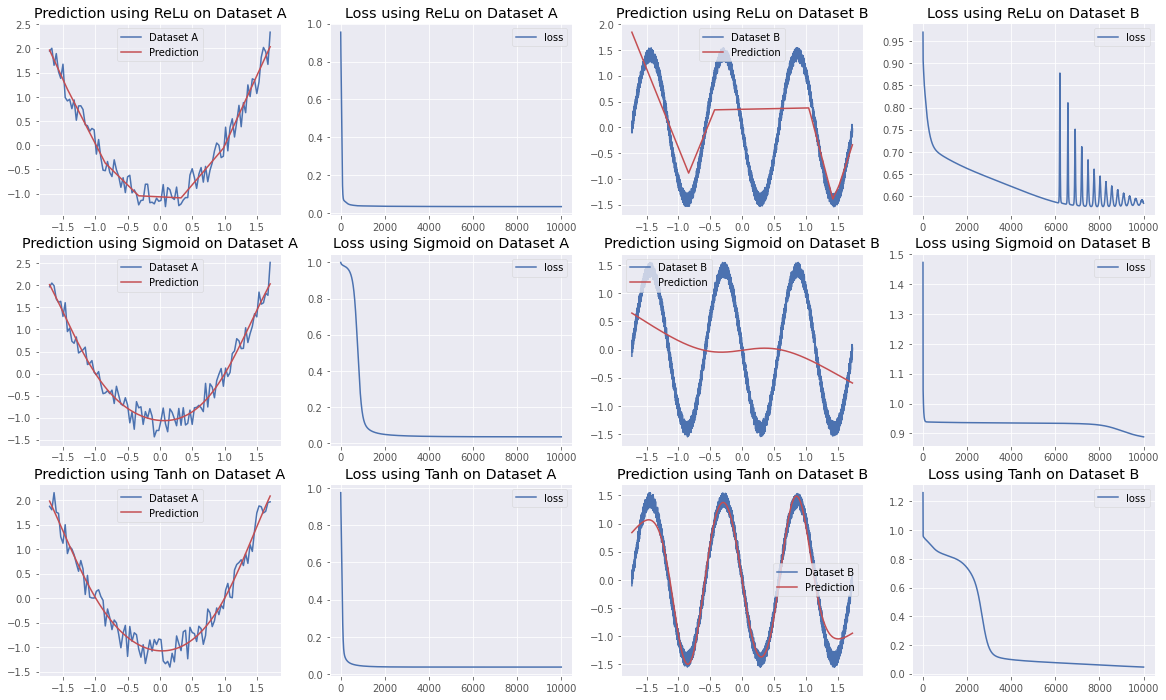

In [43]:
args = [
    # Relu
    { 'dataset': "A", 'model_type': "sequential", 'activation_fcn': "relu", 'regularization_type': None },
    { 'dataset': "B", 'model_type': "sequential", 'activation_fcn': "relu", 'regularization_type': None },

    # Sigmoid
    { 'dataset': "A", 'model_type': "sequential", 'activation_fcn': "sigmoid", 'regularization_type': None },
    { 'dataset': "B", 'model_type': "sequential", 'activation_fcn': "sigmoid", 'regularization_type': None },
    
    # Tanh
    { 'dataset': "A", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': None },
    { 'dataset': "B", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': None }
]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[0])
axs[0, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[0, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[0, 0].set_title("Prediction using ReLu on Dataset A")
axs[0, 0].legend()
axs[0, 1].plot(epochs, losses, label="loss")
axs[0, 1].set_title("Loss using ReLu on Dataset A")
axs[0, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[1])
axs[0, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[0, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[0, 2].set_title("Prediction using ReLu on Dataset B")
axs[0, 2].legend()
axs[0, 3].plot(epochs, losses, label="loss")
axs[0, 3].set_title("Loss using ReLu on Dataset B")
axs[0, 3].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[2])
axs[1, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[1, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[1, 0].set_title("Prediction using Sigmoid on Dataset A")
axs[1, 0].legend()
axs[1, 1].plot(epochs, losses, label="loss")
axs[1, 1].set_title("Loss using Sigmoid on Dataset A")
axs[1, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[3])
axs[1, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[1, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[1, 2].set_title("Prediction using Sigmoid on Dataset B")
axs[1, 2].legend()
axs[1, 3].plot(epochs, losses, label="loss")
axs[1, 3].set_title("Loss using Sigmoid on Dataset B")
axs[1, 3].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[4])
axs[2, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[2, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[2, 0].set_title("Prediction using Tanh on Dataset A")
axs[2, 0].legend()
axs[2, 1].plot(epochs, losses, label="loss")
axs[2, 1].set_title("Loss using Tanh on Dataset A")
axs[2, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[5])
axs[2, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[2, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[2, 2].set_title("Prediction using Tanh on Dataset B")
axs[2, 2].legend()
axs[2, 3].plot(epochs, losses, label="loss")
axs[2, 3].set_title("Loss using Tanh on Dataset B")
axs[2, 3].legend()

plt.legend()
plt.show()

From the plot above, we can clearly see that for the dataset A, all the activation functions resulted in the convergence of the loss, therefore all the prediction models have great accuracy. For the dataset B in the other hand, we can see that for the ReLu activation the loss is a bit unstable as it oscilates a lot, resulting in a bad accuracy. The Sigmoid activation does not oscilate, but it keeps the loss function stable at a relatively high value, which gives a prediction not that accurate (we can also notice that the loss starts to decrease by 9000 epochs, which induce us to think that by increasing the nbEpoch we could achieve a better result). Finally, the Tanh activation makes the loss converge very well, which gives us a very accurate prediction.

### Compares Regularization Types

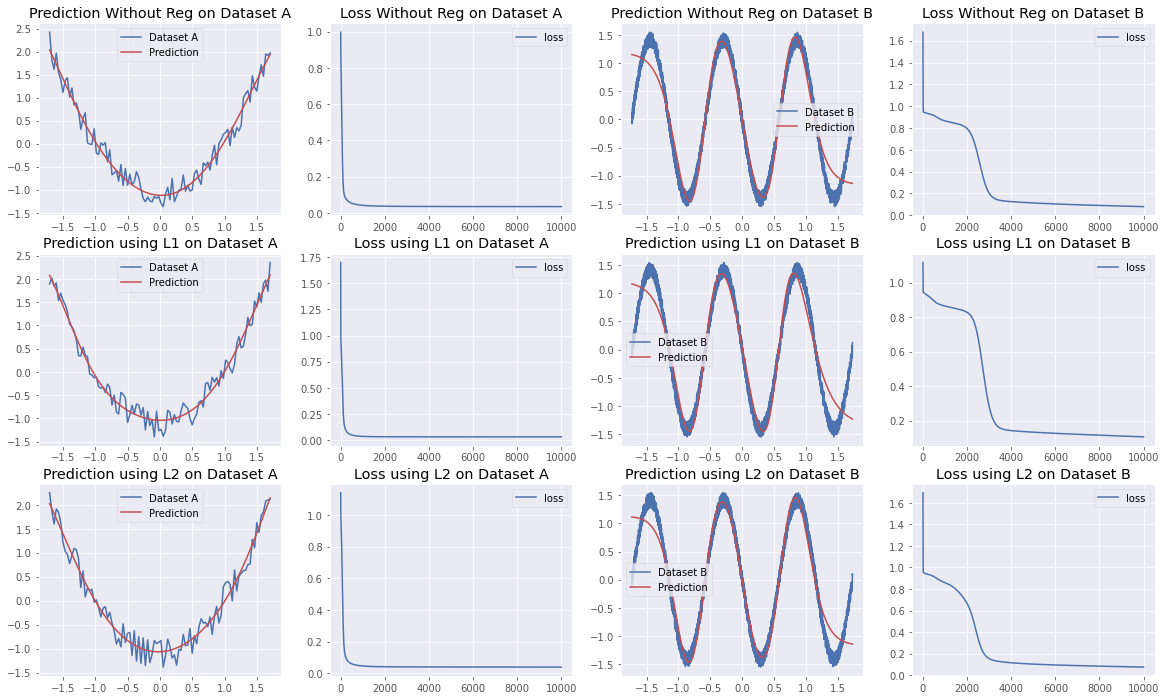

In [44]:
args = [
    # No regularization
    { 'dataset': "A", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': None },
    { 'dataset': "B", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': None },

    # L1
    { 'dataset': "A", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': "L1" },
    { 'dataset': "B", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': "L1" },
    
    # L2
    { 'dataset': "A", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': "L2" },
    { 'dataset': "B", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': "L2" }
]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[0])
axs[0, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[0, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[0, 0].set_title("Prediction Without Reg on Dataset A")
axs[0, 0].legend()
axs[0, 1].plot(epochs, losses, label="loss")
axs[0, 1].set_title("Loss Without Reg on Dataset A")
axs[0, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[1])
axs[0, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[0, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[0, 2].set_title("Prediction Without Reg on Dataset B")
axs[0, 2].legend()
axs[0, 3].plot(epochs, losses, label="loss")
axs[0, 3].set_title("Loss Without Reg on Dataset B")
axs[0, 3].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[2])
axs[1, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[1, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[1, 0].set_title("Prediction using L1 on Dataset A")
axs[1, 0].legend()
axs[1, 1].plot(epochs, losses, label="loss")
axs[1, 1].set_title("Loss using L1 on Dataset A")
axs[1, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[3])
axs[1, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[1, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[1, 2].set_title("Prediction using L1 on Dataset B")
axs[1, 2].legend()
axs[1, 3].plot(epochs, losses, label="loss")
axs[1, 3].set_title("Loss using L1 on Dataset B")
axs[1, 3].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[4])
axs[2, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[2, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[2, 0].set_title("Prediction using L2 on Dataset A")
axs[2, 0].legend()
axs[2, 1].plot(epochs, losses, label="loss")
axs[2, 1].set_title("Loss using L2 on Dataset A")
axs[2, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[5])
axs[2, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[2, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[2, 2].set_title("Prediction using L2 on Dataset B")
axs[2, 2].legend()
axs[2, 3].plot(epochs, losses, label="loss")
axs[2, 3].set_title("Loss using L2 on Dataset B")
axs[2, 3].legend()

plt.legend()
plt.show()

For the dataset A, we can say tha using different types of regularization doesn't influenciate that much the final result, as all three loss functions converged very fastly. For the dataset B, in the other hand, we can say that even though all three regularizations obtained great results, the use of L2 regularization made the function converge faster than the use of L1 which, in turn, converged faster than without any regularization.

### Compares Models

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


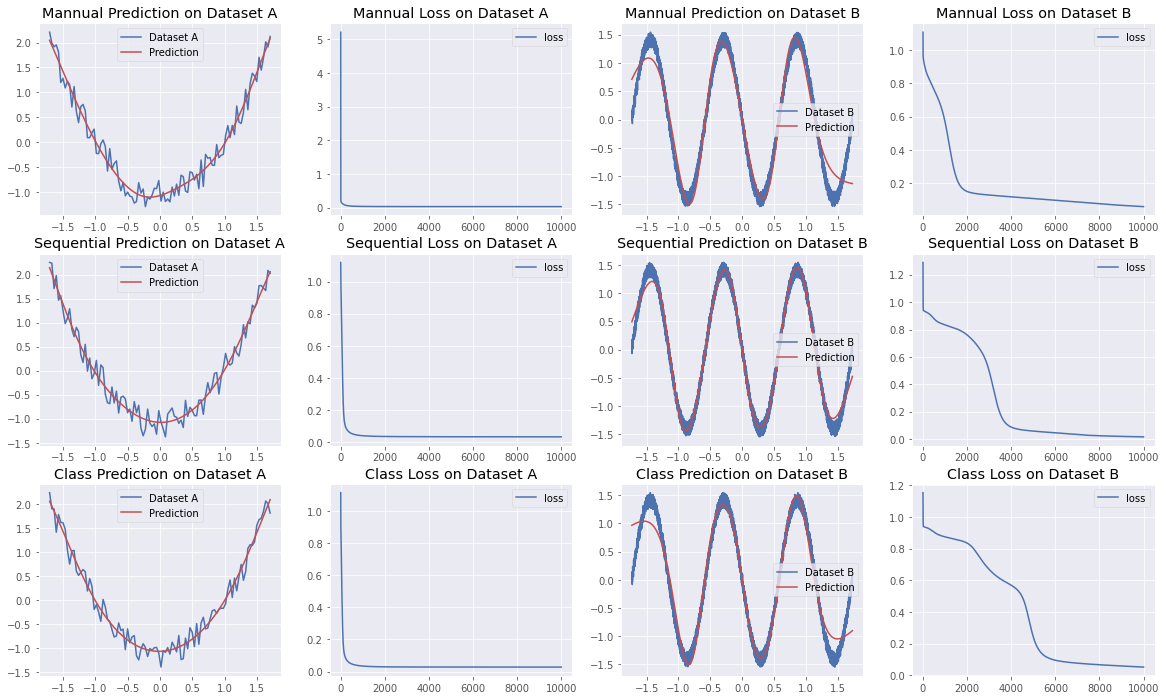

In [45]:
args = [
    # Mannual
    { 'dataset': "A", 'model_type': "mannual", 'activation_fcn': "tanh", 'regularization_type': None },
    { 'dataset': "B", 'model_type': "mannual", 'activation_fcn': "tanh", 'regularization_type': None },

    # Sequential
    { 'dataset': "A", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': None },
    { 'dataset': "B", 'model_type': "sequential", 'activation_fcn': "tanh", 'regularization_type': None },
    
    # Class
    { 'dataset': "A", 'model_type': "class", 'activation_fcn': "tanh", 'regularization_type': None },
    { 'dataset': "B", 'model_type': "class", 'activation_fcn': "tanh", 'regularization_type': None }
]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[0])
axs[0, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[0, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[0, 0].set_title("Mannual Prediction on Dataset A")
axs[0, 0].legend()
axs[0, 1].plot(epochs, losses, label="loss")
axs[0, 1].set_title("Mannual Loss on Dataset A")
axs[0, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[1])
axs[0, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[0, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[0, 2].set_title("Mannual Prediction on Dataset B")
axs[0, 2].legend()
axs[0, 3].plot(epochs, losses, label="loss")
axs[0, 3].set_title("Mannual Loss on Dataset B")
axs[0, 3].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[2])
axs[1, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[1, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[1, 0].set_title("Sequential Prediction on Dataset A")
axs[1, 0].legend()
axs[1, 1].plot(epochs, losses, label="loss")
axs[1, 1].set_title("Sequential Loss on Dataset A")
axs[1, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[3])
axs[1, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[1, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[1, 2].set_title("Sequential Prediction on Dataset B")
axs[1, 2].legend()
axs[1, 3].plot(epochs, losses, label="loss")
axs[1, 3].set_title("Sequential Loss on Dataset B")
axs[1, 3].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[4])
axs[2, 0].plot(x_data.numpy(), y_data.numpy(), label="Dataset A")
axs[2, 0].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[2, 0].set_title("Class Prediction on Dataset A")
axs[2, 0].legend()
axs[2, 1].plot(epochs, losses, label="loss")
axs[2, 1].set_title("Class Loss on Dataset A")
axs[2, 1].legend()

x_data, y_data, hat_y, epochs, losses = MLP_regression(**args[5])
axs[2, 2].plot(x_data.numpy(), y_data.numpy(), label="Dataset B")
axs[2, 2].plot(x_data.numpy(), hat_y.detach().numpy(), label="Prediction")
axs[2, 2].set_title("Class Prediction on Dataset B")
axs[2, 2].legend()
axs[2, 3].plot(epochs, losses, label="loss")
axs[2, 3].set_title("Class Loss on Dataset B")
axs[2, 3].legend()

plt.legend()
plt.show()

For the dataset A, we can't see much difference from the use of different models as all of them performed very well, convering the loss function very fastly. For the dataset B, even though all the models also obtained a great result, we can see that the mannual (model 1) model converged faster than the sequential (model 2) one which, in turn, converged faster than the class model (model 3).